In [2]:
import pandas as pd

In [3]:
test_data = pd.read_csv('car_prices_test.csv')
train_data = pd.read_csv('car_prices_train.csv')

In [4]:
test_data.head()

,ID,Brand,Model,Model Year,Mileage,Fuel Type,Engine,Liter,Transmission,Speed,Exterior Color,Interior Color,Accident,Clean Title
0,0,Mercedes-Benz,C-Class C 300 4MATIC,2013,15959,Gasoline,335.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,4.7,7-Speed A/T,7.0,Red,Black,None reported,Yes
1,1,INFINITI,QX60 Base,2018,54394,Gasoline,265.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,3.5,Transmission w/Dual Shift Mode,NaN,Gray,Black,None reported,Yes
2,2,Chevrolet,Camaro 2SS,2020,37464,Gasoline,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,6.2,Transmission w/Dual Shift Mode,NaN,Blue,Black,None reported,Yes
3,3,RAM,2500 Laramie,2016,145185,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6.7,6-Speed A/T,6.0,Red,Black,None reported,Yes
4,4,Honda,Pilot EX-L,2018,43509,Gasoline,3.5L V6 24V GDI SOHC,3.5,CVT Transmission,NaN,Gray,Gray,At least 1 accident or damage reported,Yes


In [5]:
train_data.head()

,Brand,Model,Model Year,Mileage,Fuel Type,Engine,Liter,Transmission,Speed,Exterior Color,Interior Color,Accident,Clean Title,Price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,3.7,6-Speed A/T,6.0,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,3.8,8-Speed Automatic,8.0,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,3.5,Automatic,NaN,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,3.5,7-Speed A/T,7.0,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,2.0,8-Speed Automatic,8.0,Glacier White Metallic,Black,None reported,NaN,34999


In [6]:
def getCylinder(engineStr):
    if("Cylinder" in engineStr):
        index=engineStr.split(" ").index("Cylinder")-1
        return engineStr.split(" ")[index]
    else:
        return "0"

def getV(engineStr):
    list=engineStr.split(" ")
    for element in list:
        try:
            if("V"==element[len(element)-1]):
                return (element.replace("V",""))
        except:
            continue
    return "0"

def getHP(engineStr):
    list=engineStr.split(" ")
    for element in list:
        if("HP" in element):
            return element.replace("HP","")

    return "0"


def engineType(engineStr):
    if("Gasoline" in engineStr):
        return "1"
    elif "Diesel" in engineStr:
        return "2"
    elif "Electric" in engineStr:
        return "3"
    elif "DOHC" in engineStr:
        return "4"
    elif "Flex Fuel" in engineStr:
        return "5"
    else:
        return "0"

def isTurbo(engineStr):
    if ("Turbo" not in engineStr):
        return "0"
    else:
        if("Twin Turbo" in engineStr):
            return "2"
        else:
            return "1"

In [7]:
train_data['HP']=[getHP(element) for element in train_data['Engine']]
test_data['HP']=[getHP(element) for element in test_data['Engine']]
train_data['Turbo']=[isTurbo(element) for element in train_data['Engine']]
test_data['Turbo']=[isTurbo(element) for element in test_data['Engine']]
train_data['EngineType']=[engineType(element) for element in train_data['Engine']]
test_data['EngineType']=[engineType(element) for element in test_data['Engine']]
train_data['Cylinder']=[getCylinder(element) for element in train_data['Engine']]
test_data['Cylinder']=[getCylinder(element) for element in test_data['Engine']]
train_data['V']=[getV(element) for element in train_data['Engine']]
test_data['V']=[getV(element) for element in test_data['Engine']]

In [8]:
test_data.head()

,ID,Brand,Model,Model Year,Mileage,Fuel Type,Engine,Liter,Transmission,Speed,Exterior Color,Interior Color,Accident,Clean Title,HP,Turbo,EngineType,Cylinder,V
0,0,Mercedes-Benz,C-Class C 300 4MATIC,2013,15959,Gasoline,335.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,4.7,7-Speed A/T,7.0,Red,Black,None reported,Yes,335.0,0,1,8,0
1,1,INFINITI,QX60 Base,2018,54394,Gasoline,265.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,3.5,Transmission w/Dual Shift Mode,NaN,Gray,Black,None reported,Yes,265.0,0,1,V6,0
2,2,Chevrolet,Camaro 2SS,2020,37464,Gasoline,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,6.2,Transmission w/Dual Shift Mode,NaN,Blue,Black,None reported,Yes,455.0,0,1,8,0
3,3,RAM,2500 Laramie,2016,145185,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6.7,6-Speed A/T,6.0,Red,Black,None reported,Yes,350.0,0,2,6,0
4,4,Honda,Pilot EX-L,2018,43509,Gasoline,3.5L V6 24V GDI SOHC,3.5,CVT Transmission,NaN,Gray,Gray,At least 1 accident or damage reported,Yes,0,0,0,0,24


In [9]:
engineTypes=["PDI","TFSI","GDI","SOHC","DOHC","Straight"]
transmissionTypes=["A/T","Automatic","Auto-Shift","Dual Shift Mode","CVT","Overdrive","M/T"]
for element in engineTypes:
    train_data[element]=[element in elementx for elementx in train_data['Engine']]
    test_data[element]=[element in elementx for elementx in test_data['Engine']]

for element in transmissionTypes:
    train_data[element]=[element in elementx for elementx in train_data['Transmission']]
    test_data[element]=[element in elementx for elementx in test_data['Transmission']]

categorical_columns= ["Brand","Model","Fuel Type","Turbo","EngineType","Straight","HP","Transmission","V","Exterior Color","Interior Color","Accident","Clean Title","Cylinder"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for element in categorical_columns:
    train_data[element]=le.fit_transform(train_data[element])
    test_data[element]=le.fit_transform(test_data[element])
X=train_data.drop(columns=["Price","Engine"])
Y=train_data[['Price']]

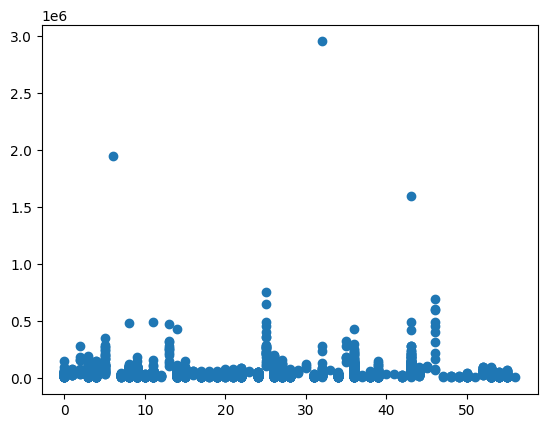

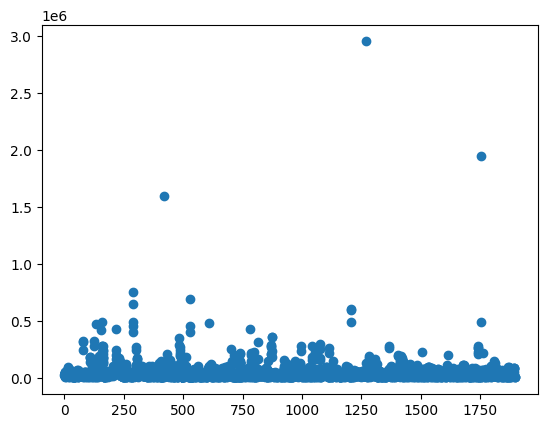

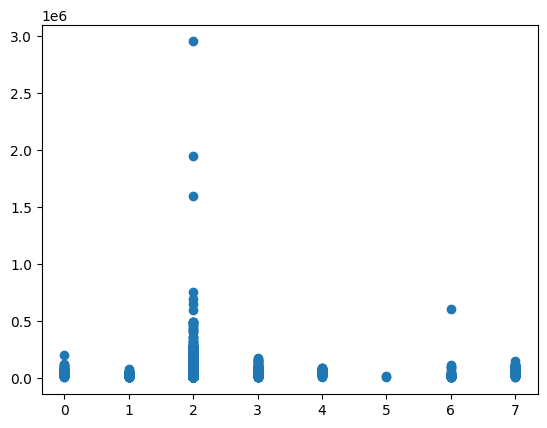

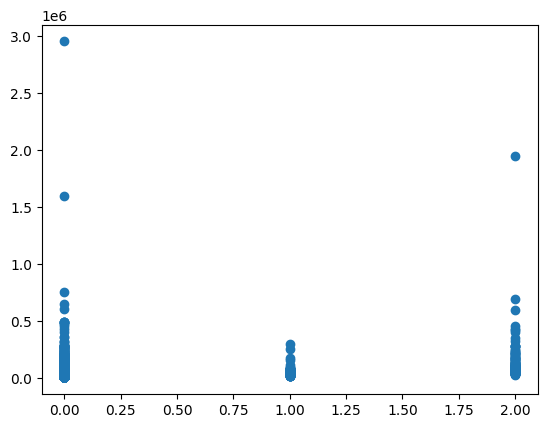

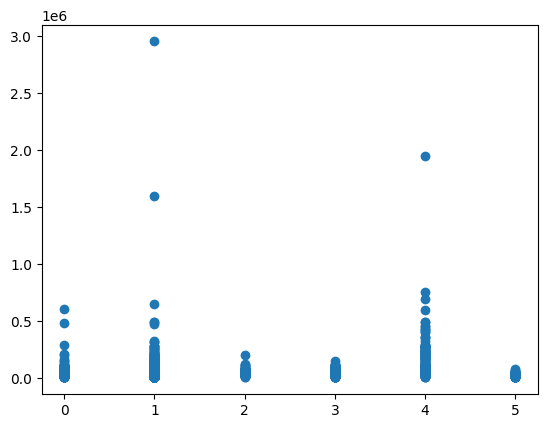

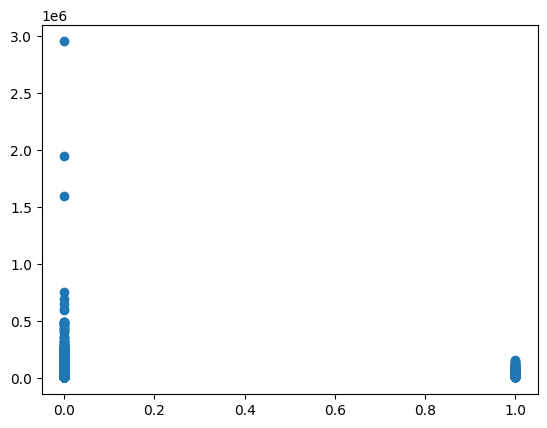

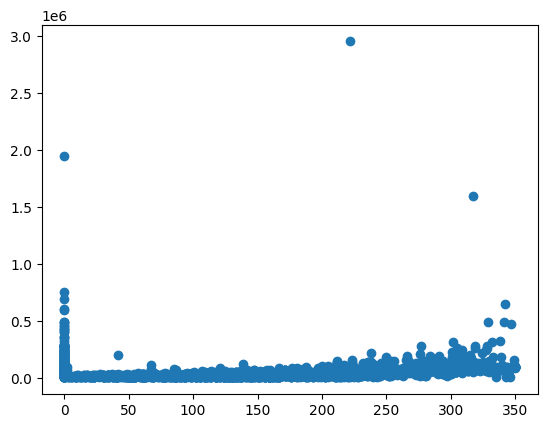

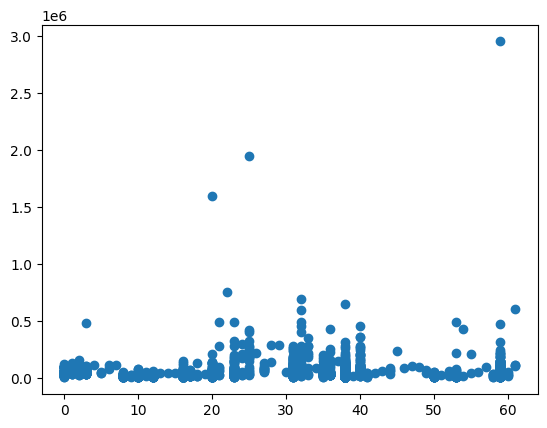

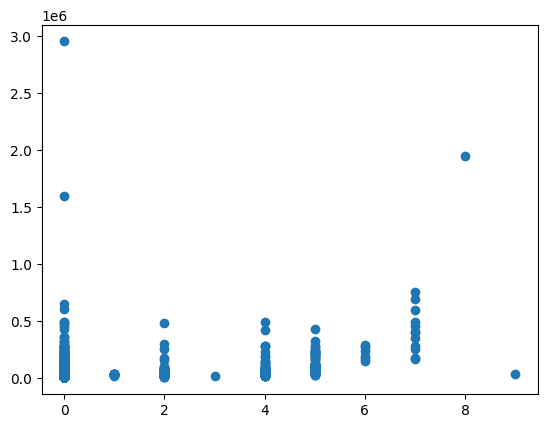

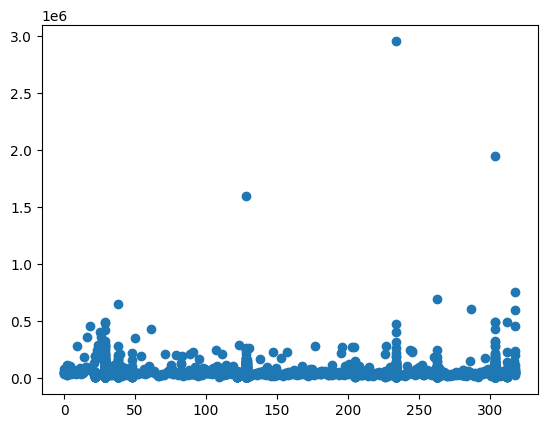

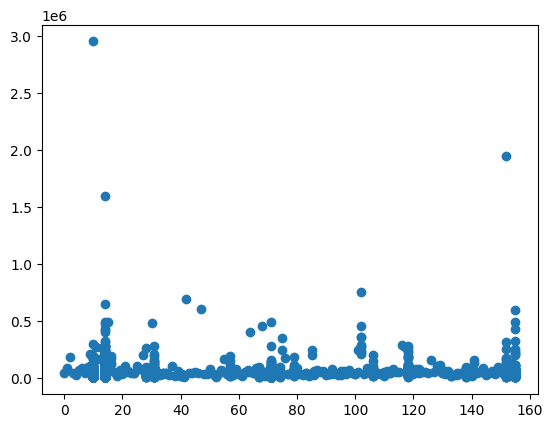

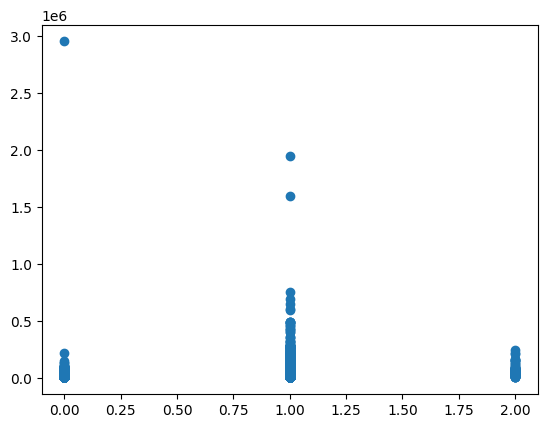

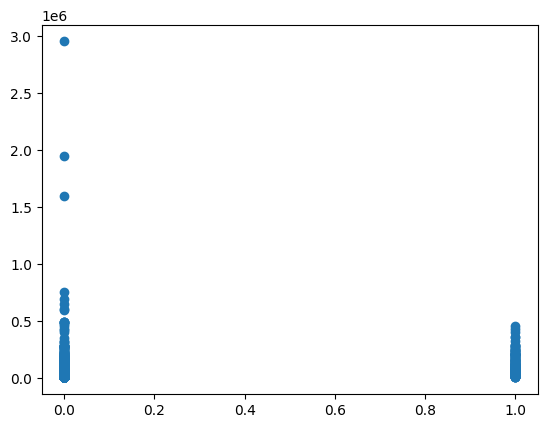

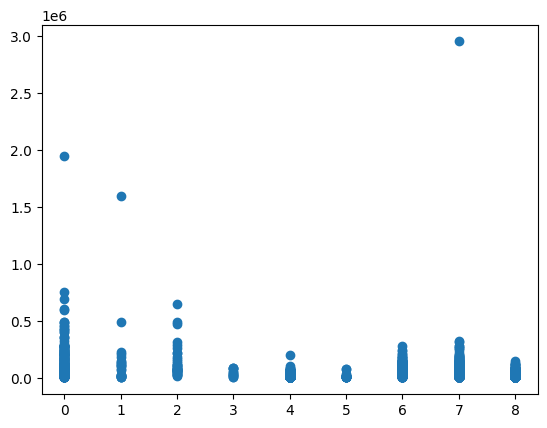

In [10]:
#Checking Data Behaviour

import matplotlib.pyplot as plt
plt.scatter(X['Brand'], Y)
plt.show()
plt.scatter(X['Model'], Y)
plt.show()
plt.scatter(X['Fuel Type'], Y)
plt.show()
plt.scatter(X['Turbo'], Y)
plt.show()
plt.scatter(X['EngineType'], Y)
plt.show()
plt.scatter(X['Straight'], Y)
plt.show()
plt.scatter(X['HP'], Y)
plt.show()
plt.scatter(X['Transmission'], Y)
plt.show()
plt.scatter(X['V'], Y)
plt.show()
plt.scatter(X['Exterior Color'], Y)
plt.show()
plt.scatter(X['Interior Color'], Y)
plt.show()
plt.scatter(X['Accident'], Y)
plt.show()
plt.scatter(X['Clean Title'], Y)
plt.show()
plt.scatter(X['Cylinder'], Y)

In [11]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

trainData,testData,trainTarget,testTarget=train_test_split(X,Y,shuffle=True,random_state=30,test_size=0.4)
model=XGBRegressor()
model.fit(trainData,trainTarget)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
print(mean_absolute_error(model.predict(trainData),trainTarget))

1974.8269945426196


In [13]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(model, file)